In [1]:
import matplotlib.pyplot as plt

from network import Network
from activations import *
from losses import *
from regularizers import *
from utils import read_monk, Range_random
from metrics import Accuracy

# Testing Monk's Problems

## Monk 1

In [2]:
X_train, X_test, y_train, y_test = read_monk(train_path='../data/monk/monks-1.train', test_path='../data/monk/monks-1.test')

In [34]:
np.random.seed(6)
net = Network(MSE(1), eta=1e-1)

net.add_layer(
    input_size=len(X_train[0]),
    units_size=4,
    starting=Range_random(),
    activation=ReLU()
)

net.add_layer(
    input_size=4,
    units_size=1,
    starting=Range_random(),
    activation=Sigmoid()
)

In [35]:
statistics = net.train(
    X_train=X_train,
    y_train=y_train,
    X_val=X_test,
    y_val=y_test,
    epochs=200,
    patience=50,
    metric=Accuracy()
)

Epochs: 100%|██████████| 200/200 [00:01<00:00, 187.96it/s]


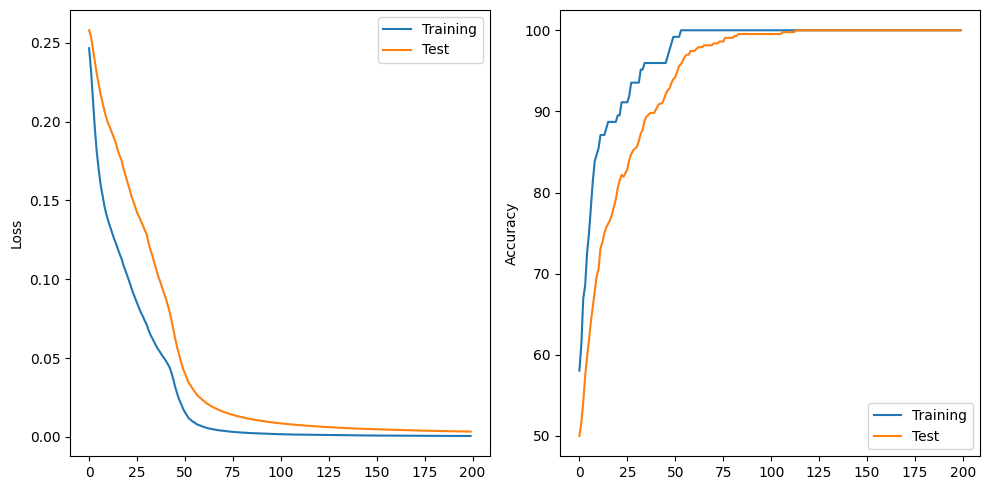

In [36]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(statistics['tr_losses'], label='Training')
plt.plot(statistics['val_losses'], label='Test')
plt.legend()
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(statistics['tr_metrics'], label='Training')
plt.plot(statistics['val_metrics'], label='Test')
plt.legend()
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [37]:
statistics = net.statistics(X_test, y_test, Accuracy())
print(f'Loss on test set: {statistics[0]}\nAccuracy on test set: {statistics[1]}')

Loss on test set: 0.003310488122205888
Accuracy on test set: 100.0


## Monk 2

In [38]:
X_train, X_test, y_train, y_test = read_monk(train_path='../data/monk/monks-2.train', test_path='../data/monk/monks-2.test')

In [48]:
np.random.seed(6)
net = Network(MSE(1), eta=1e-2)

net.add_layer(
    input_size=len(X_train[0]),
    units_size=3,
    starting=Range_random(),
    activation=ReLU(),
    #momentum=('Standard', 0.99)
)

net.add_layer(
    input_size=3,
    units_size=1,
    starting=Range_random(),
    activation=Sigmoid(),
    #momentum=('Standard', 0.99)
)

In [49]:
statistics = net.train(
    X_train=X_train,
    y_train=y_train,
    X_val=X_test,
    y_val=y_test,
    epochs=200,
    patience=50,
    metric=Accuracy()
)

Epochs: 100%|██████████| 200/200 [00:01<00:00, 157.09it/s]


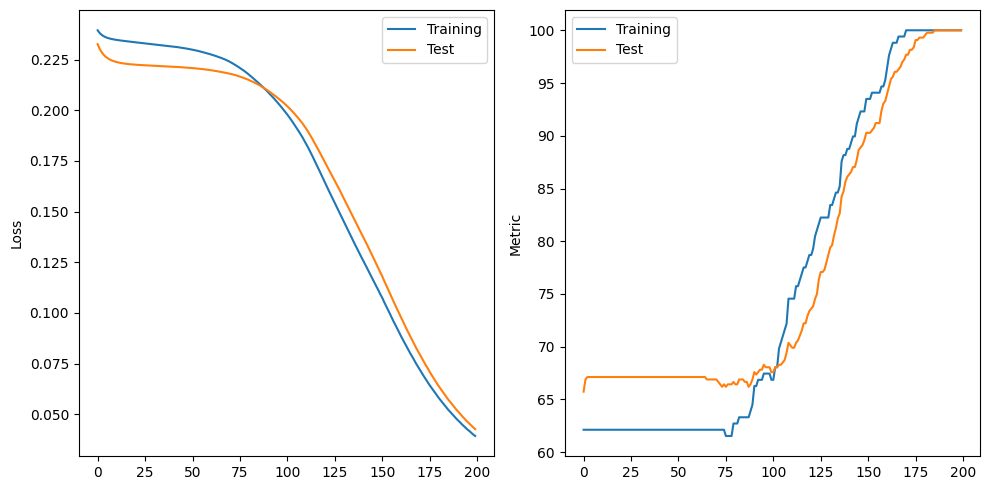

In [50]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(statistics['tr_losses'], label='Training')
plt.plot(statistics['val_losses'], label='Test')
plt.legend()
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(statistics['tr_metrics'], label='Training')
plt.plot(statistics['val_metrics'], label='Test')
plt.legend()
plt.ylabel('Metric')

plt.tight_layout()
plt.show()

In [51]:
statistics = net.statistics(X_test, y_test, Accuracy())
print(f'Loss on test set: {statistics[0]}\nAccuracy on test set: {statistics[1]}')

Loss on test set: 0.04260490525576257
Accuracy on test set: 100.0


## Monk 3 without Regularization

In [52]:
X_train, X_test, y_train, y_test = read_monk(train_path='../data/monk/monks-3.train', test_path='../data/monk/monks-3.test')

In [53]:
np.random.seed(6)
net = Network(MSE(1), eta=1e-2)

net.add_layer(
    input_size=len(X_train[0]),
    units_size=3,
    starting=Range_random(),
    activation=ReLU()
)

net.add_layer(
    input_size=3,
    units_size=1,
    starting=Range_random(),
    activation=Sigmoid()
)

In [54]:
statistics = net.train(
    X_train=X_train,
    y_train=y_train,
    X_val=X_test,
    y_val=y_test,
    epochs=1000,
    patience=50,
    metric=Accuracy()
)

Epochs:  24%|██▍       | 239/1000 [00:01<00:03, 191.59it/s]


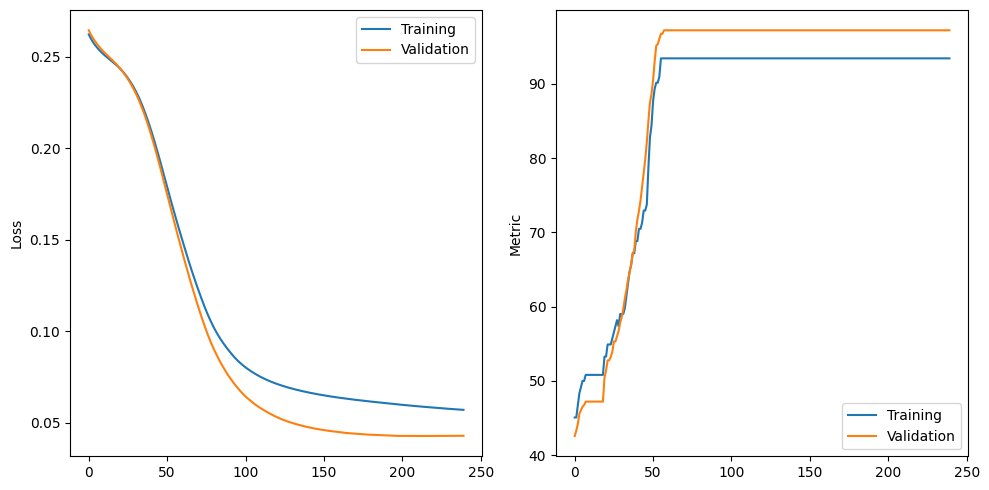

In [55]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(statistics['tr_losses'], label='Training')
plt.plot(statistics['val_losses'], label='Test')
plt.legend()
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(statistics['tr_metrics'], label='Training')
plt.plot(statistics['val_metrics'], label='Test')
plt.legend()
plt.ylabel('Metric')

plt.tight_layout()
plt.show()

In [56]:
statistics = net.statistics(X_test, y_test, Accuracy())
print(f'Loss on test set: {statistics[0]}\nAccuracy on test set: {statistics[1]}')

Loss on test set: 0.04315148650394315
Accuracy on test set: 97.22222222222221


## Monk 3 with Regularization

In [84]:
np.random.seed(6)
net = Network(MSE(1), eta=1e-2)

net.add_layer(
    input_size=len(X_train[0]),
    units_size=3,
    starting=Range_random(),
    activation=ReLU(),
    regularizer=L2(1e-6)
)

net.add_layer(
    input_size=3,
    units_size=1,
    starting=Range_random(),
    activation=Sigmoid(),
    regularizer=L2(1e-6)
)

In [85]:
statistics = net.train(
    X_train=X_train,
    y_train=y_train,
    X_val=X_test,
    y_val=y_test,
    epochs=1000,
    patience=50,
    metric=Accuracy()
)

Epochs:  25%|██▌       | 251/1000 [00:01<00:04, 184.42it/s]


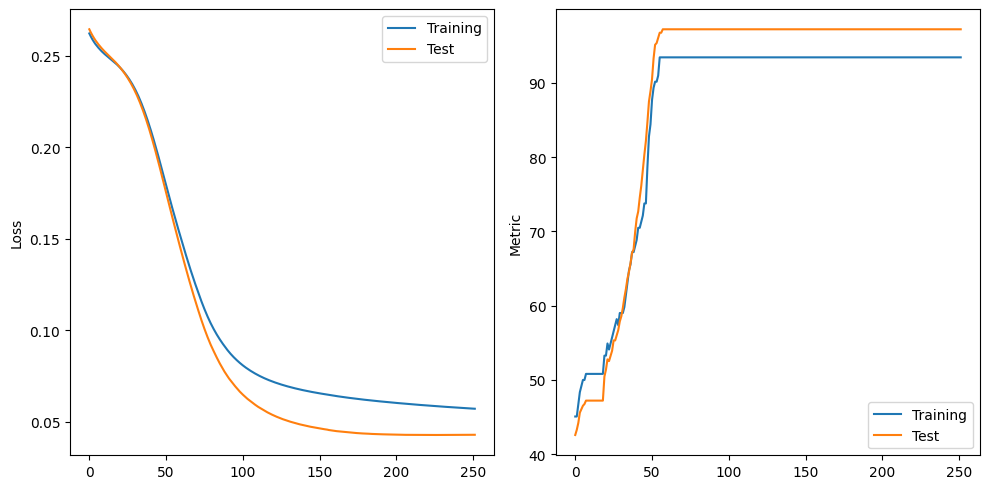

In [86]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(statistics['tr_losses'], label='Training')
plt.plot(statistics['val_losses'], label='Test')
plt.legend()
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(statistics['tr_metrics'], label='Training')
plt.plot(statistics['val_metrics'], label='Test')
plt.legend()
plt.ylabel('Metric')

plt.tight_layout()
plt.show()

In [87]:
statistics = net.statistics(X_test, y_test, Accuracy())
print(f'Loss on test set: {statistics[0]}\nAccuracy on test set: {statistics[1]}')

Loss on test set: 0.042860284302261326
Accuracy on test set: 97.22222222222221
